In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y= True)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [5]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9210526315789473
[[ 9  0  0]
 [ 0 13  3]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.81      0.90        16
           2       0.81      1.00      0.90        13

    accuracy                           0.92        38
   macro avg       0.94      0.94      0.93        38
weighted avg       0.94      0.92      0.92        38



[Text(0.4444444444444444, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [41, 37, 34]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'X[2] <= 4.85\ngini = 0.499\nsamples = 71\nvalue = [0, 37, 34]'),
 Text(0.3333333333333333, 0.5833333333333334, 'X[0] <= 4.95\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.7777777777777778, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.5555555555

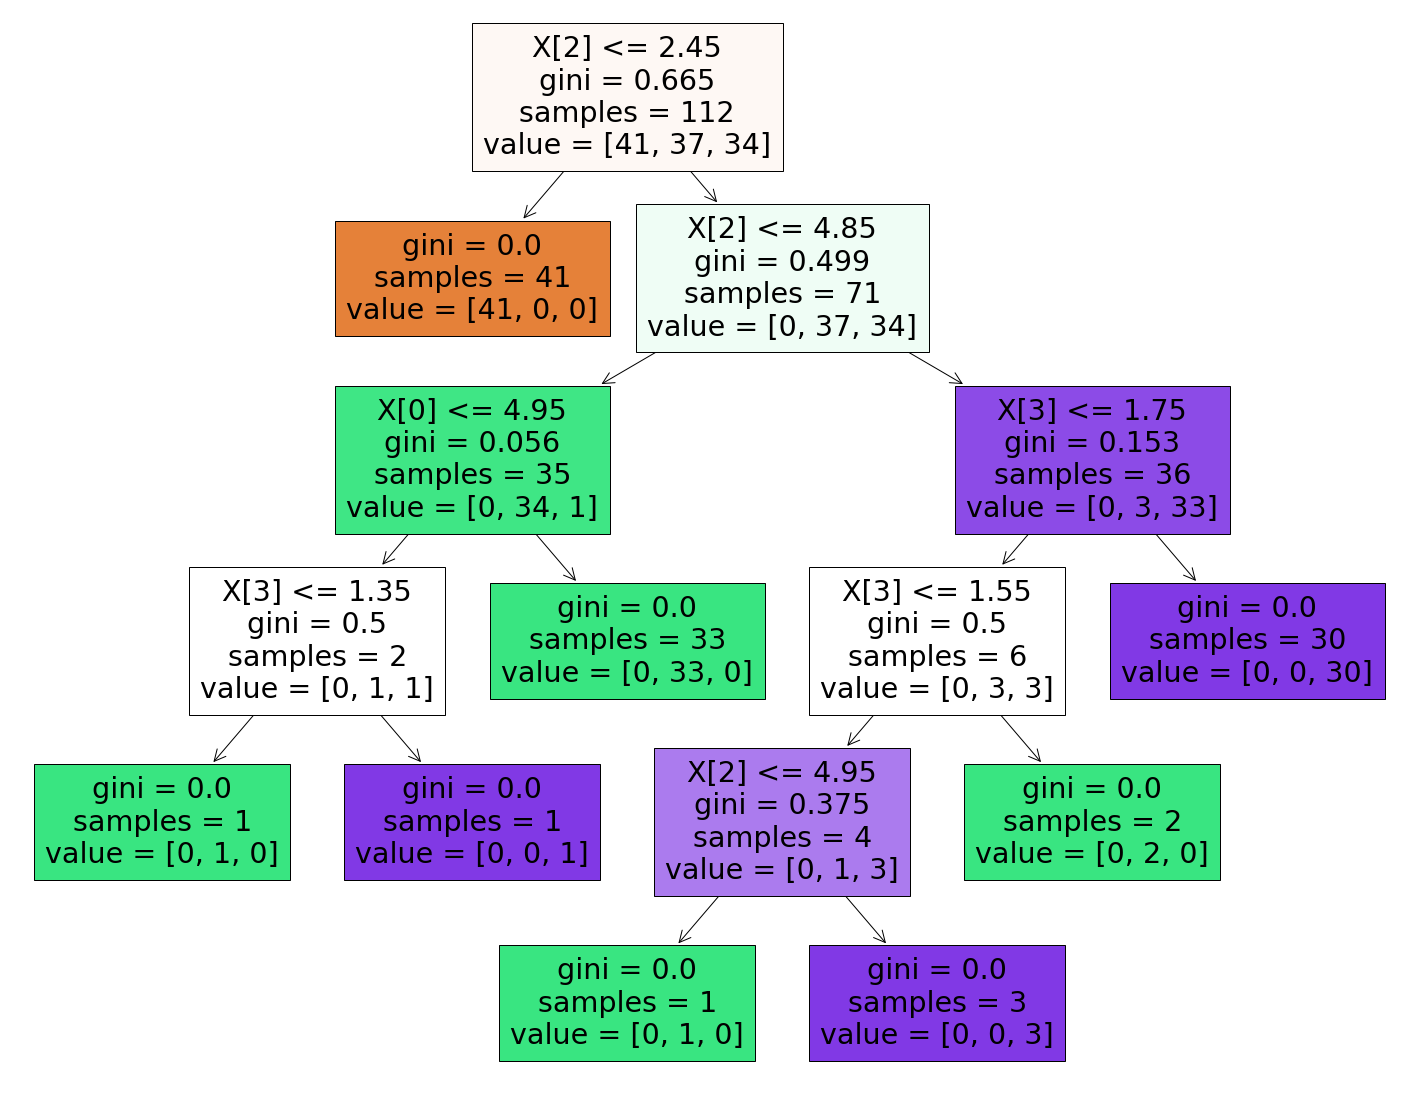

In [13]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)

### Post-prunning

In [14]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9210526315789473
[[ 9  0  0]
 [ 0 12  2]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.86      0.89        14
           2       0.88      0.93      0.90        15

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [41, 37, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.85\ngini = 0.499\nsamples = 71\nvalue = [0, 37, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 3, 33]')]

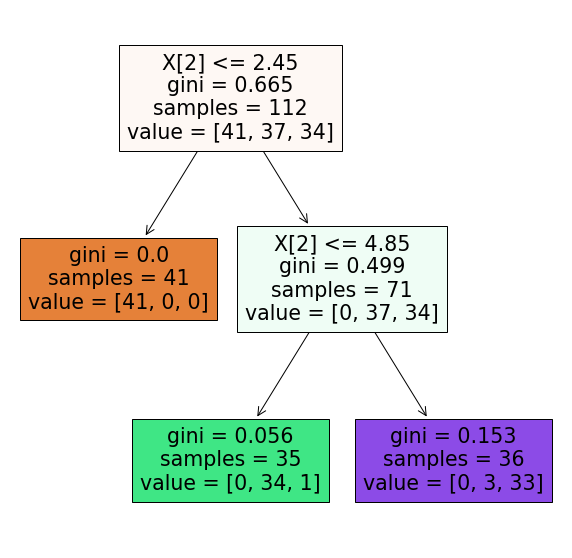

In [16]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)

### Pre-prunning

In [17]:
params = {
    'criterion' : ["gini", "entropy", "log_loss"], 
    'splitter' : ["best", "random"],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv = StratifiedKFold(),n_jobs=-1)

In [19]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [20]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'best'}

In [21]:
grid.best_score_

0.9549407114624506

In [22]:
y_pred = grid.predict(X_test)

In [23]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9736842105263158
[[ 9  0  0]
 [ 0 13  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



# Regression

In [24]:
from sklearn.datasets import load_diabetes

In [25]:
X,y = load_diabetes(return_X_y=True)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.28652059983762834